## Import necessary packages and library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read the csv file data

In [2]:
housing = pd.read_csv('house_price_data.csv')

## Visualize the data

In [3]:
housing.head()

,Area,Address,Horizontal,Road_width,Type_of_house,Price
0,90.0,1,6.0,15.0,1,18.8
1,50.0,2,6.0,24.0,1,20.0
2,60.0,3,4.0,5.0,1,11.5
3,68.0,4,4.0,6.0,1,17.2
4,55.0,3,4.6,5.0,1,10.6


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4603 entries, 0 to 4602
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           4603 non-null   float64
 1   Address        4603 non-null   int64  
 2   Horizontal     4603 non-null   float64
 3   Road_width     4603 non-null   float64
 4   Type_of_house  4603 non-null   int64  
 5   Price          4603 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 215.9 KB


In [5]:
housing.describe()

,Area,Address,Horizontal,Road_width,Type_of_house,Price
count,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000
mean,76.922453,105.988486,5.633967,9.587594,1.615251,20.480990
std,67.083558,130.615409,6.942546,10.486231,0.496316,31.568548
min,1.004000,1.000000,0.000000,0.000000,1.000000,1.050000
25%,41.000000,22.000000,4.200000,3.000000,1.000000,5.000000
50%,55.000000,69.000000,4.435066,5.000000,2.000000,9.450000
75%,81.000000,140.000000,5.500000,10.000000,2.000000,20.100000
max,750.000000,1202.000000,401.000000,110.000000,3.000000,259.000000


In [6]:
housing.columns

Index(['Area', 'Address', 'Horizontal', 'Road_width', 'Type_of_house',
       'Price'],
      dtype='object')

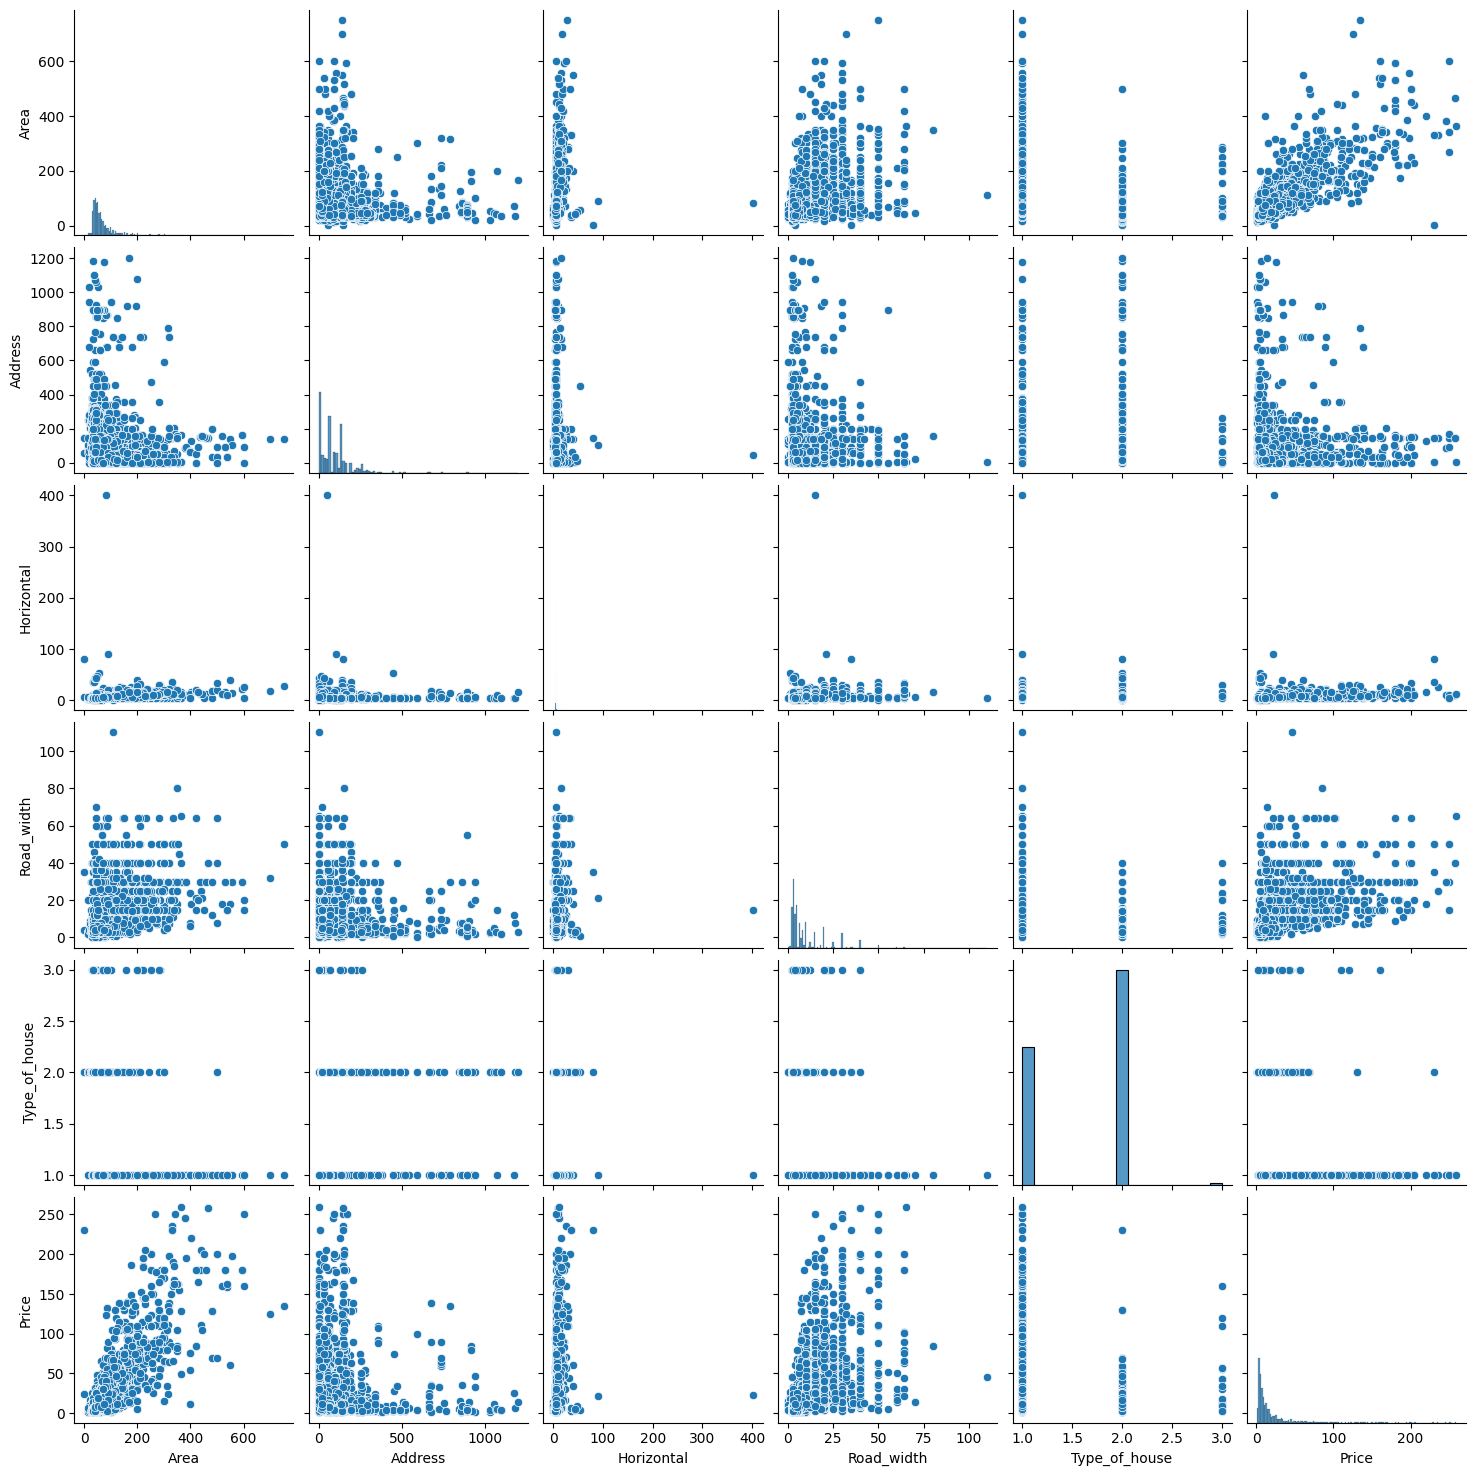

In [7]:
sns.pairplot(housing)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24644\2126917716.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing['Price'])


<Axes: xlabel='Price', ylabel='Density'>

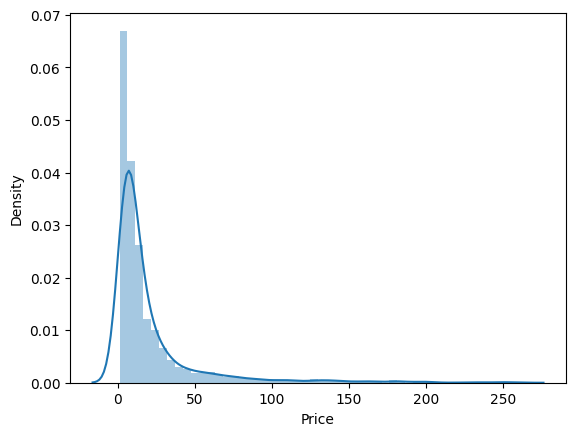

In [8]:
sns.distplot(housing['Price'])

<Axes: >

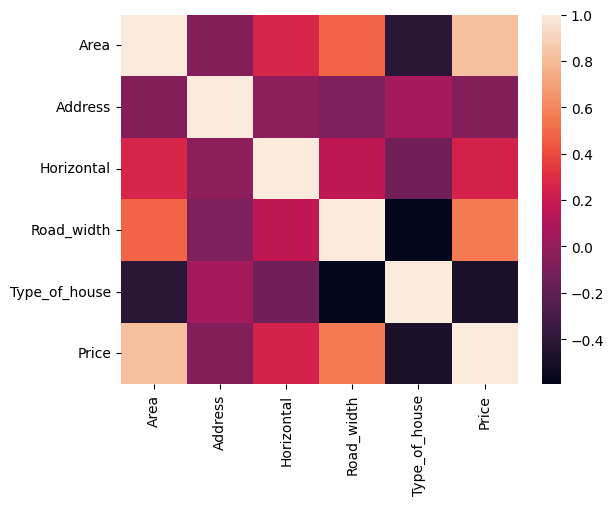

In [9]:
sns.heatmap(housing.corr())

## Split data into training and test sets

In [10]:
X = housing[['Area', 'Address', 'Horizontal',
               'Road_width', 'Type_of_house']]
y = housing['Price']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Using sklearn to train data using Linear Regression algorithm

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train,y_train)

LinearRegression()

## Intercept

In linear regression, the term "intercept" refers to the value of the predicted response variable when all predictor variables are set to zero. In a simple linear regression model with one predictor variable, the model can be represented by the equation:

#### $\hat{y}$ = b_0 + b_1 * x

Here:
- $\hat{y}$ is the predicted response variable,
- b_0 is the intercept, representing the predicted value of $\hat{y}$ when x = 0,
- b_1 is the coefficient of the predictor variable x,
- x is the value of the predictor variable.

The intercept is the point where the regression line intersects the y-axis when the predictor variable is zero. It provides insight into the baseline level of the response variable when all predictors are absent or have zero influence.

In the context of multiple linear regression with more than one predictor variable, the equation becomes more complex, including an intercept for each predictor variable. This allows the model to understand how the predicted response variable changes when each predictor variable changes while holding others constant.

When training a linear regression model, machine learning libraries typically optimize the values of the intercept and coefficients to best capture the relationship between the predictor variables and the response variable. The intercept reflects the model's estimation of the response variable when all predictors are at their baseline values.

In [16]:
print(lm.intercept_)

-0.259096824627175


In [17]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

               Coefficient
Area              0.331557
Address          -0.004138
Horizontal        0.094614
Road_width        0.469764
Type_of_house    -5.762929


## Predict house prices on the test set

In [18]:
predictions = lm.predict(X_test)

## Visualize the difference between y_test and predictions

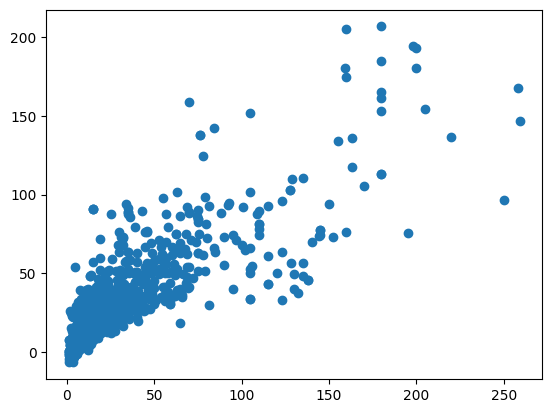

In [19]:
plt.scatter(y_test,predictions)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24644\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


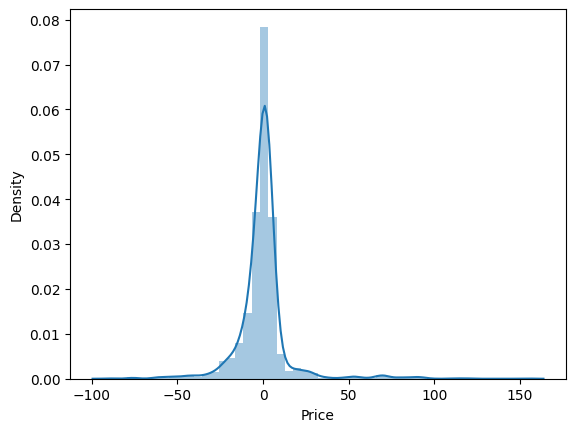

In [20]:
sns.distplot((y_test-predictions),bins=50);

## Using metrics to calculate the accuracy of model

In [21]:
from sklearn import metrics

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2-Score:', metrics.r2_score(y_test, predictions))

MAE: 7.986337282846355
MSE: 251.5028086086435
RMSE: 15.858840077655223
R2-Score: 0.7256476025117178
